<a href="https://colab.research.google.com/github/skar0123/code_master/blob/main/Keras_MNIST_fashion_data_ML_deep_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2


In [5]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

Now we have the above mnist_fashion data set, we have 60k images for traing the moel and 10k images for testing the model. now we have to perform data preprocessing


In [7]:
x_train = x_train/255.0
y_train = tf.keras.utils.to_categorical(y_train)

Now let's check shapes of the data. the shapes are change for categorical data

In [8]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000, 10))

**Now let's build the ML model**

In [14]:
model =tf.keras.models.Sequential()
model.add(tf.keras.layers.Input((28, 28), name = "Input"))
model.add(tf.keras.layers.Flatten(name = "Flat"))
model.add(tf.keras.layers.Dense(512, activation = tf.keras.activations.relu, name = "HiddenLayer1"))
model.add(tf.keras.layers.Dense(128, activation = tf.keras.activations.relu, name = "HiddenLayer2"))
model.add(tf.keras.layers.Dense(10,activation = tf.keras.activations.softmax, name = "Output"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flat (Flatten)              (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 512)               401920    
                                                                 
 HiddenLayer2 (Dense)        (None, 128)               65664     
                                                                 
 Output (Dense)              (None, 10)                1290      
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 468874 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Now we are going to train this model**

In [17]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
loss = tf.keras.losses.categorical_crossentropy,
metrics = ["acc"])

**we don't need hre any learning rate, as I alreday applied SGD**

**Now Perform One Hot Encoding**

In [18]:
model.fit(x_train, y_train, batch_size=64, epochs = 20, validation_split =0.1)


Epoch 1/20
844/844 [==============================] - 7s 7ms/step - loss: 0.8326 - acc: 0.7389 - val_loss: 0.5775 - val_acc: 0.8070
Epoch 2/20
844/844 [==============================] - 7s 8ms/step - loss: 0.5360 - acc: 0.8196 - val_loss: 0.5310 - val_acc: 0.8087
Epoch 3/20
844/844 [==============================] - 6s 7ms/step - loss: 0.4819 - acc: 0.8331 - val_loss: 0.4544 - val_acc: 0.8403
Epoch 4/20
844/844 [==============================] - 6s 7ms/step - loss: 0.4529 - acc: 0.8434 - val_loss: 0.4612 - val_acc: 0.8308
Epoch 5/20
844/844 [==============================] - 7s 9ms/step - loss: 0.4323 - acc: 0.8508 - val_loss: 0.4535 - val_acc: 0.8397
Epoch 6/20
844/844 [==============================] - 6s 7ms/step - loss: 0.4165 - acc: 0.8556 - val_loss: 0.4271 - val_acc: 0.8455
Epoch 7/20
844/844 [==============================] - 7s 9ms/step - loss: 0.4030 - acc: 0.8599 - val_loss: 0.4002 - val_acc: 0.8578
Epoch 8/20
844/844 [==============================] - 5s 6ms/step - loss: 0.

**Now Let's calculate the Loss**

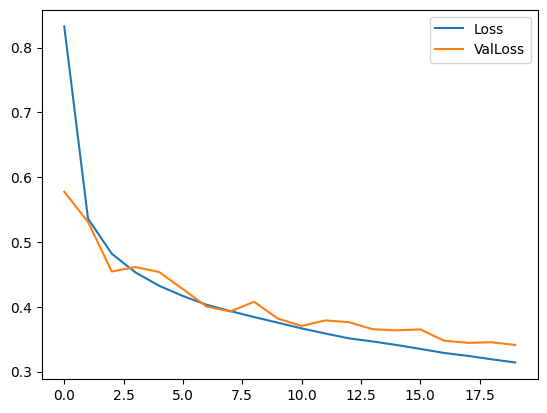

In [19]:
plt.plot(model.history.history["loss"], label ="Loss")
plt.plot(model.history.history["val_loss"], label = "ValLoss")
plt.legend()

this model is very good, fantastic, the loss is very few

9

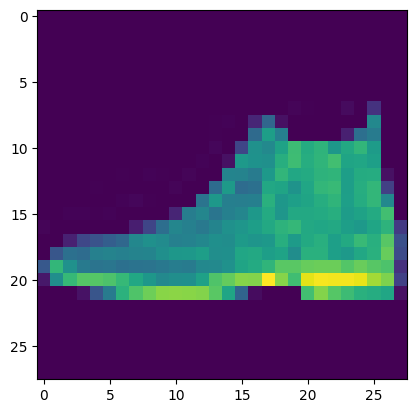

In [20]:
# Metrics
test_image = x_test[0]
plt.imshow(test_image)
y_test[0]

Now can I directly give this image to my model and ask it some question, No! never, I have to first normalize the images as the model accepts only normalized images. so I have to preprocess the images

In [21]:
test_image = test_image / 255.0

In [22]:
test_image.shape

(28, 28)

In [23]:
model.input_shape

(None, 28, 28)

that is the model is expecting the 28x28 images and also a none image that is it does not know I send it 1 image or 2 image or what that is how many images I sending so it is also put a none there. technically the above should be 1,28,28.
so how to put a 1 in place of none.
# so we need to add num_of_images in our test images

In [24]:
test_image = np.expand_dims(test_image, axis = 0)

In [25]:
test_image.shape

(1, 28, 28)

now I can send the image to my model

In [26]:
model.predict(test_image)

1/1 [==============================] - 0s 96ms/step


array([[4.2391719e-05, 6.1353953e-06, 3.7948339e-05, 2.3665103e-05,
        8.2752713e-06, 4.9245678e-02, 8.2988037e-05, 9.7959474e-02,
        5.3640055e-03, 8.4722948e-01]], dtype=float32)

now let's check the results

In [27]:
results = model.predict(test_image)
results

1/1 [==============================] - 0s 88ms/step


array([[4.2391719e-05, 6.1353953e-06, 3.7948339e-05, 2.3665103e-05,
        8.2752713e-06, 4.9245678e-02, 8.2988037e-05, 9.7959474e-02,
        5.3640055e-03, 8.4722948e-01]], dtype=float32)

In [29]:
results.max()

0.8472295

In [30]:
np.argmax(results)    # it will return the position at which maximum probability resides

9

In [33]:
def predict_func(image):
  image = image / 255.0
  image = np.expand_dims(image, axis =0)
  results = model.predict(image)
  return f"Predicted Label:{np.argmax(results)}"

Actual Label:2
1/1 [==============================] - 0s 33ms/step


'Predicted Label:2'

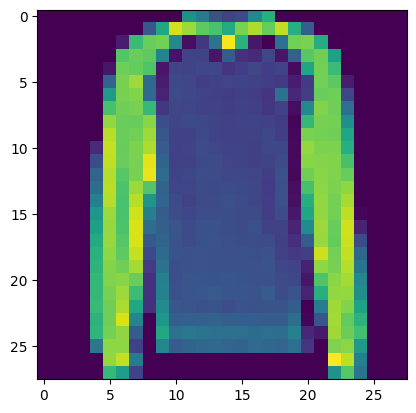

In [36]:
# lets check the 100th image hoe it looks like: f is the formatted strings
plt.imshow(x_test[455])
print(f"Actual Label:{y_test[455]}")
predict_func(x_test[455])

Ye, My model can predict! For this I have built the above inferencing functions.

In [37]:
# how to send the tetsing numbers to the clients!

x_test_v2 = x_test /255.0

In [38]:
x_test_v2.shape

(10000, 28, 28)

In [39]:
# I can directly send this to model.predict
result = model.predict(x_test_v2)

313/313 [==============================] - 1s 3ms/step


In [52]:
# the above 313 is the batch_size taken by the model for prediction

In [40]:
model.output_shape

(None, 10)

In [51]:
# the above show that for each image we have a probability of 10 and we have 10k images

In [41]:
result.shape

(10000, 10)

In [42]:
result[0]

array([4.2391803e-05, 6.1354012e-06, 3.7948375e-05, 2.3665149e-05,
       8.2752713e-06, 4.9245585e-02, 8.2988037e-05, 9.7959563e-02,
       5.3640208e-03, 8.4722948e-01], dtype=float32)

In [50]:
# when you want to done any ML operations alwys take 1 as axis as it is upside down and always acts as row

In [45]:
y_pred = np.argmax(result, axis = 1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [46]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [47]:
(y_pred==y_test)

array([ True,  True,  True, ...,  True,  True,  True])

In [49]:
# when you comapre python alwyas give true false, true false we know that true=1 and fasle=0

In [53]:
(y_pred==y_test).mean()   # the following is the accuracy: it means in every 100 images only 87 image orrectly identified by the model adn remaining 10 will not identified

0.8711

In [54]:
# lets find out the accuracy score
scores = pd.DataFrame()
scores["y_pred"]= y_pred
scores["y_test"] =y_test

In [55]:
scores

,y_pred,y_test
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
...,...,...
9995,9,9
9996,1,1
9997,8,8
9998,1,1


In [56]:
tf.keras.metrics.Accuracy()

In [61]:
import sklearn
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay

**let's find out the accuracy score**

In [62]:
accuracy_score(y_test, y_pred)

0.8711

**let's find confusion metrics**

In [65]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[867,   0,  12,  24,   6,   2,  73,   0,  16,   0],
       [  4, 966,   1,  23,   2,   0,   3,   0,   1,   0],
       [ 18,   2, 825,  10,  81,   1,  58,   0,   5,   0],
       [ 41,  10,  16, 862,  44,   0,  20,   0,   7,   0],
       [  2,   1, 123,  24, 774,   0,  67,   0,   9,   0],
       [  0,   0,   0,   1,   0, 955,   0,  28,   2,  14],
       [171,   1, 112,  26,  60,   0, 609,   0,  21,   0],
       [  0,   0,   0,   0,   0,  28,   0, 944,   0,  28],
       [  4,   1,   6,   6,   4,   2,  10,   6, 960,   1],
       [  0,   0,   0,   0,   0,   8,   0,  42,   1, 949]])

In [66]:
class_dict = {
0:  "T-shirt/top",
1:"Trouser",
2: "Pullover",
3:"Dress",
4:"Coat",
5:"Sandal",
6:"Shirt",
7:"Bag",
8:"Sneaker",
9:"Ankle boot"
}

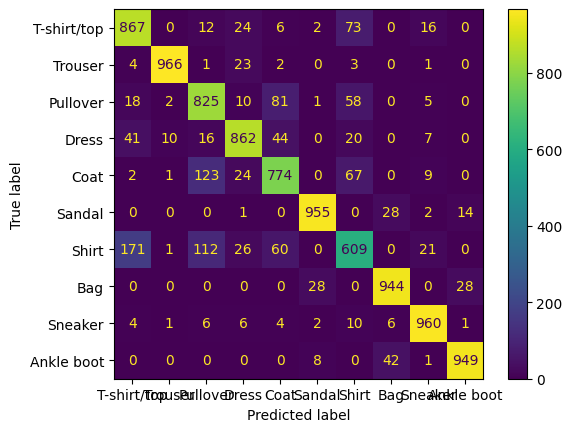

In [67]:
ConfusionMatrixDisplay(cm, display_labels=class_dict.values()).plot()

In [69]:
model.evaluate(x_test,tf.keras.utils.to_categorical (y_test))

313/313 [==============================] - 1s 3ms/step - loss: 65.9328 - acc: 0.8350


[65.93280792236328, 0.8349999785423279]

In [72]:
scores.loc[scores.y_test != scores.y_pred].index

Int64Index([  12,   17,   23,   25,   29,   40,   42,   49,   50,   51,
            ...
            9955, 9957, 9961, 9963, 9972, 9977, 9979, 9985, 9989, 9991],
           dtype='int64', length=1289)

Text(0.5, 1.0, 'Actual:7 & Predicted: 5')

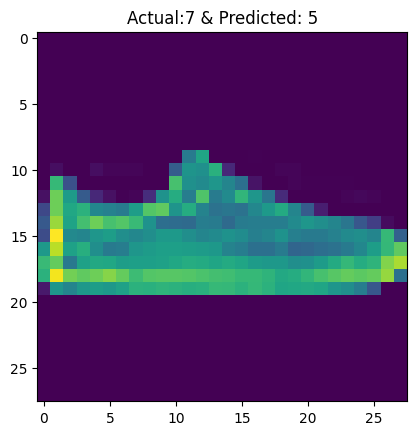

In [73]:
num = 12
plt.imshow(x_test[num])

plt.title(f"Actual:{scores.loc[num, 'y_test']} & Predicted: {scores.loc[num, 'y_pred']}")